In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import model_report as mr
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_combined_key_words_v1.csv"
df = pd.read_csv(file_info, sep='\t')

In [3]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns,clean_combined,clean_key_words
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,"('blazin herb', 'high club', 'edibles concentr...",Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...,blazin herb diamond high crew blazin herb blaz...,blazin herb high club edible concentrate flowe...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","('honey pot', 'gift certificate', 'medical mar...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...,honey pot cannabis medical marijuana product s...,honey pot gift certificate medical marijuana h...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"('cannabis producer', 'certified organic', 'pr...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...,amante organics licensed certified organic can...,cannabis producer certify organic producer alb...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"('minimum order', 'view detail', 'hybrid view'...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...,cannafly cannafly marijuana cannabis medical m...,minimum order view detail hybrid view hope min...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"('grn ventures', 'back business', 'potential m...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...,grn ventures back business brand potential mar...,grn venture back business potential market lea...


In [4]:
df['category'].unique()

array(['dr', 'ed', 'sp', 'mk', 'bu', 'os', 'sx'], dtype=object)

In [5]:
from collections import Counter
df_group_by = df.groupby('category')['clean_key_words'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))

In [6]:
df_group_by

category
bu    [(service, 1916), (product, 1829), (business, ...
dr    [(seed, 1024), (cannabis, 995), (marijuana, 96...
ed    [(school, 1584), (university, 726), (college, ...
mk    [(home, 1873), (service, 1566), (design, 935),...
os    [(product, 1134), (add, 994), (gift, 916), (pr...
sp    [(club, 681), (golf, 472), (sport, 432), (foot...
sx    [(sex, 3996), (porn, 2835), (video, 2374), (fr...
Name: clean_key_words, dtype: object

# Frequency of 25 Most Common Words

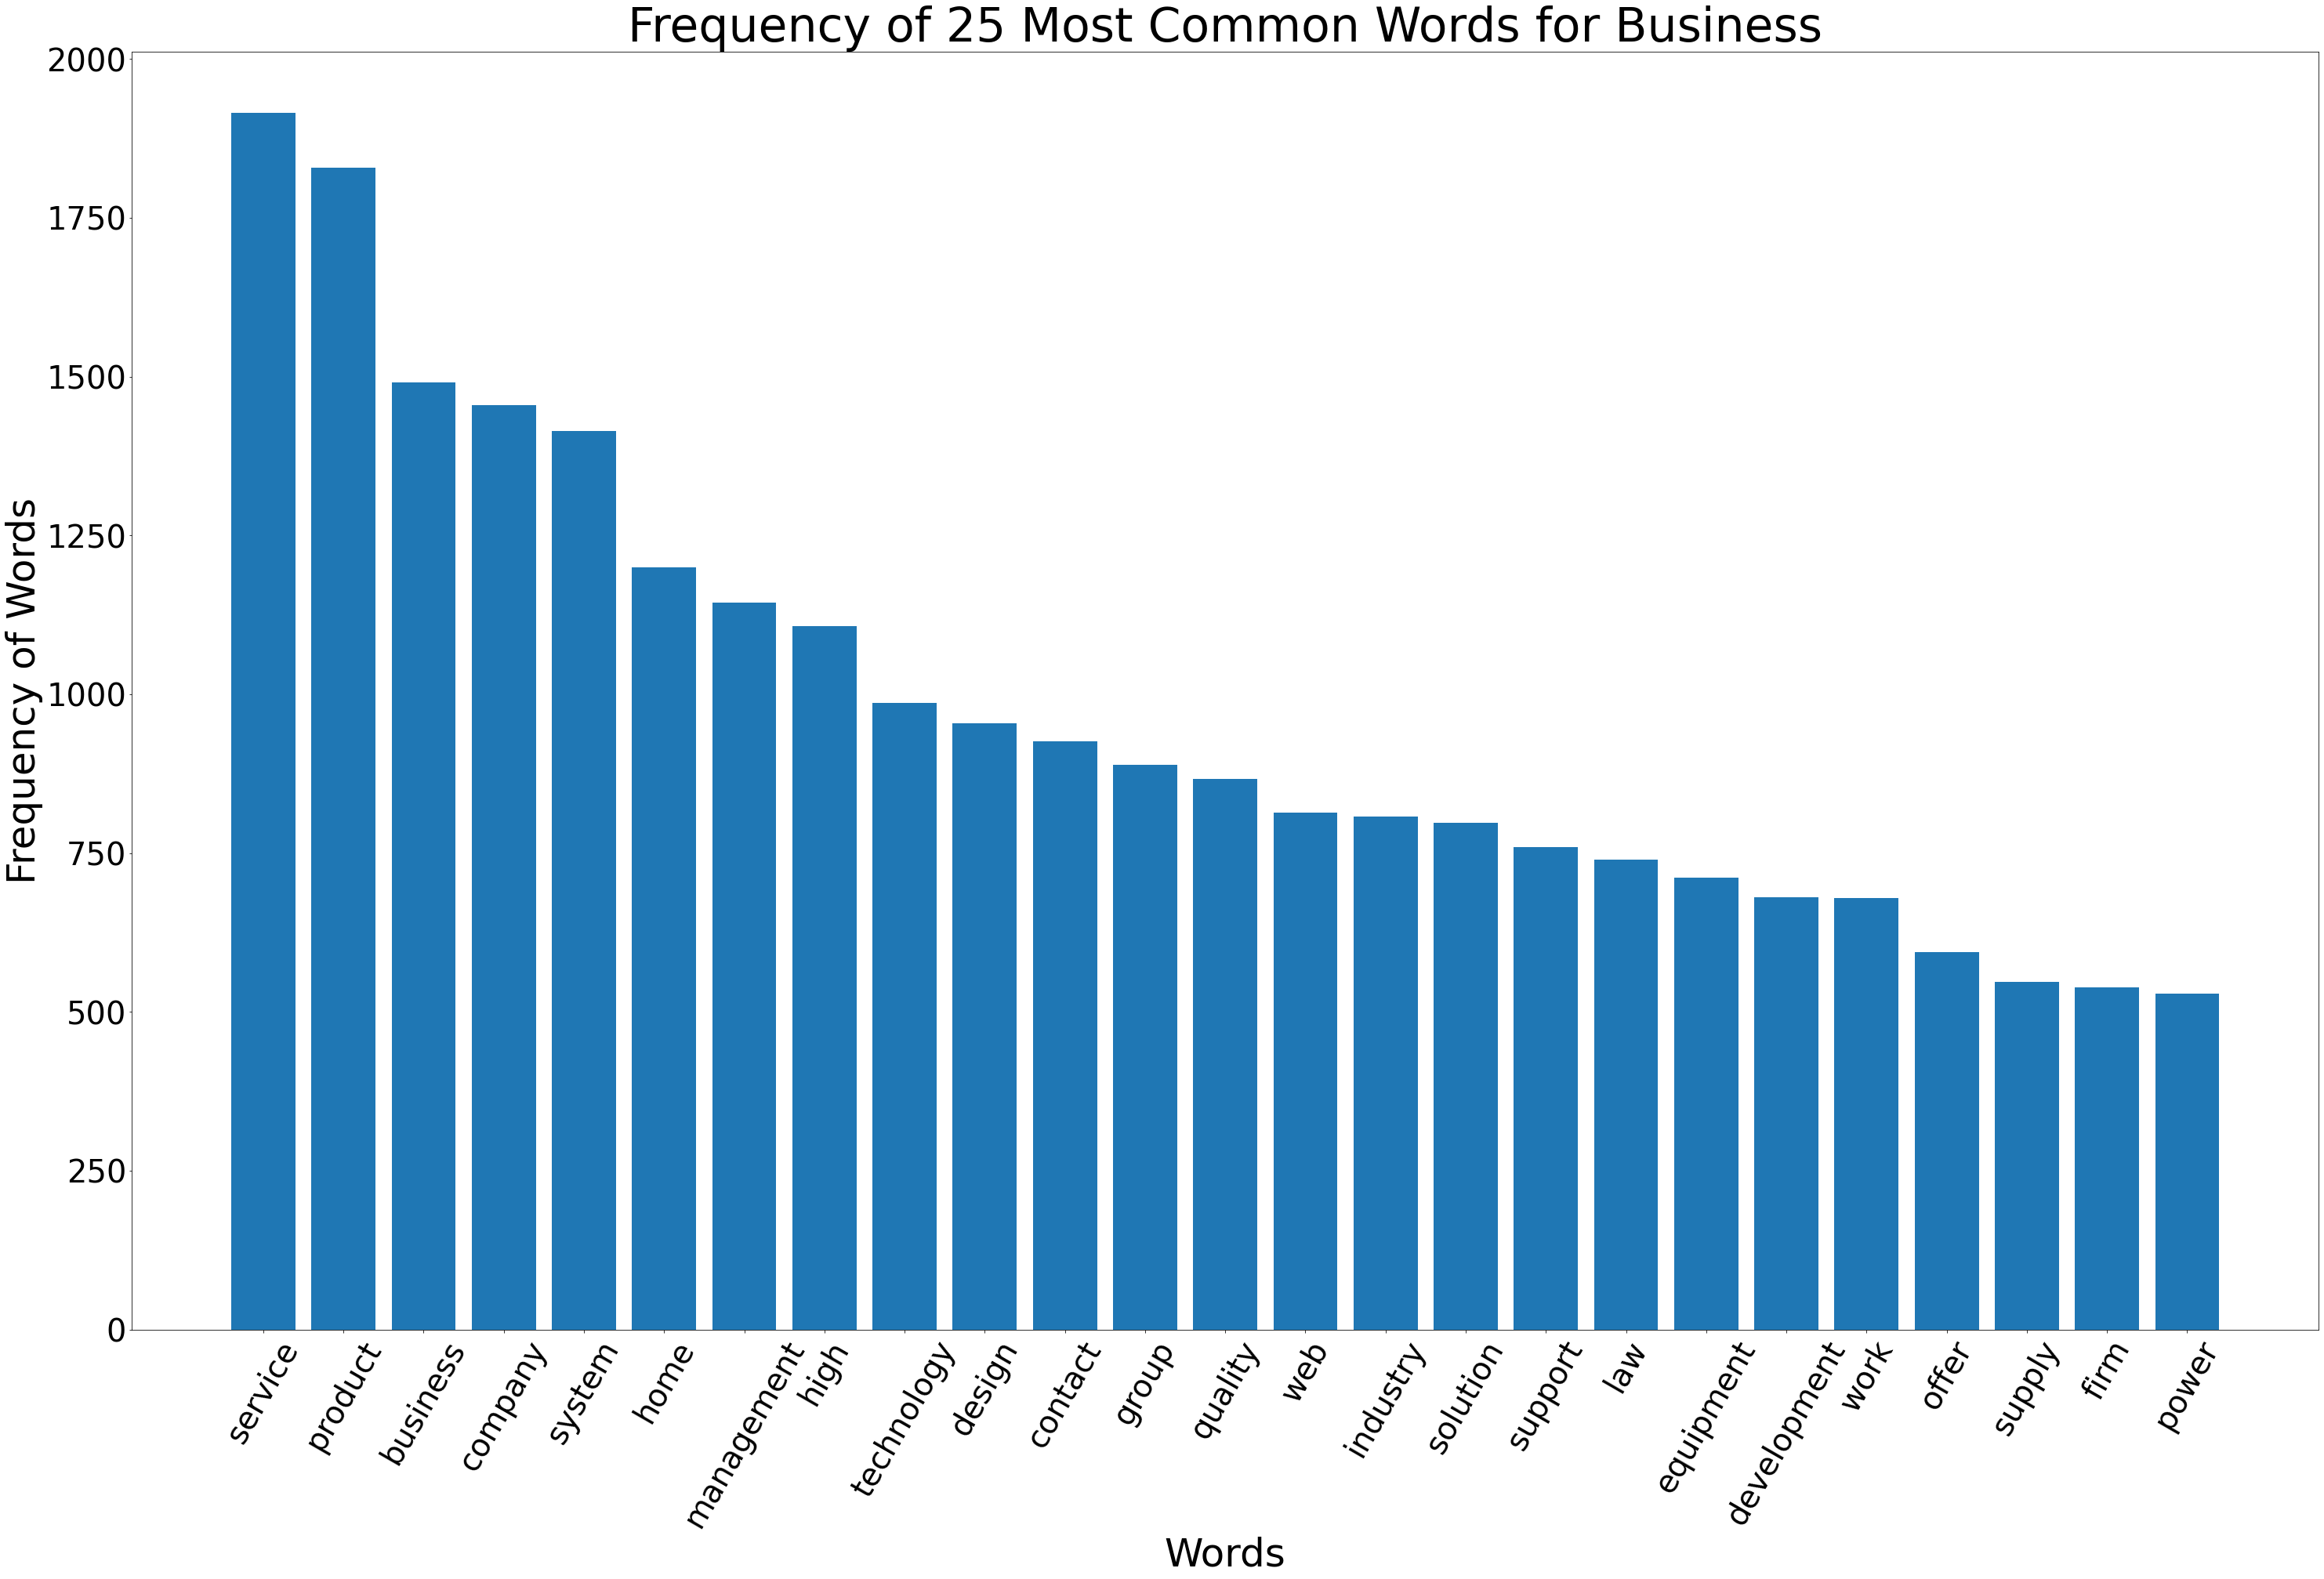

In [7]:
#Business
group_by_bu = df_group_by.iloc[0]
words_bu = list(zip(*group_by_bu))[0]
freq_bu = list(zip(*group_by_bu))[1]

plt.figure(figsize=(50,30))
plt.bar(words_bu, freq_bu)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Business', fontsize=60)
plt.show()

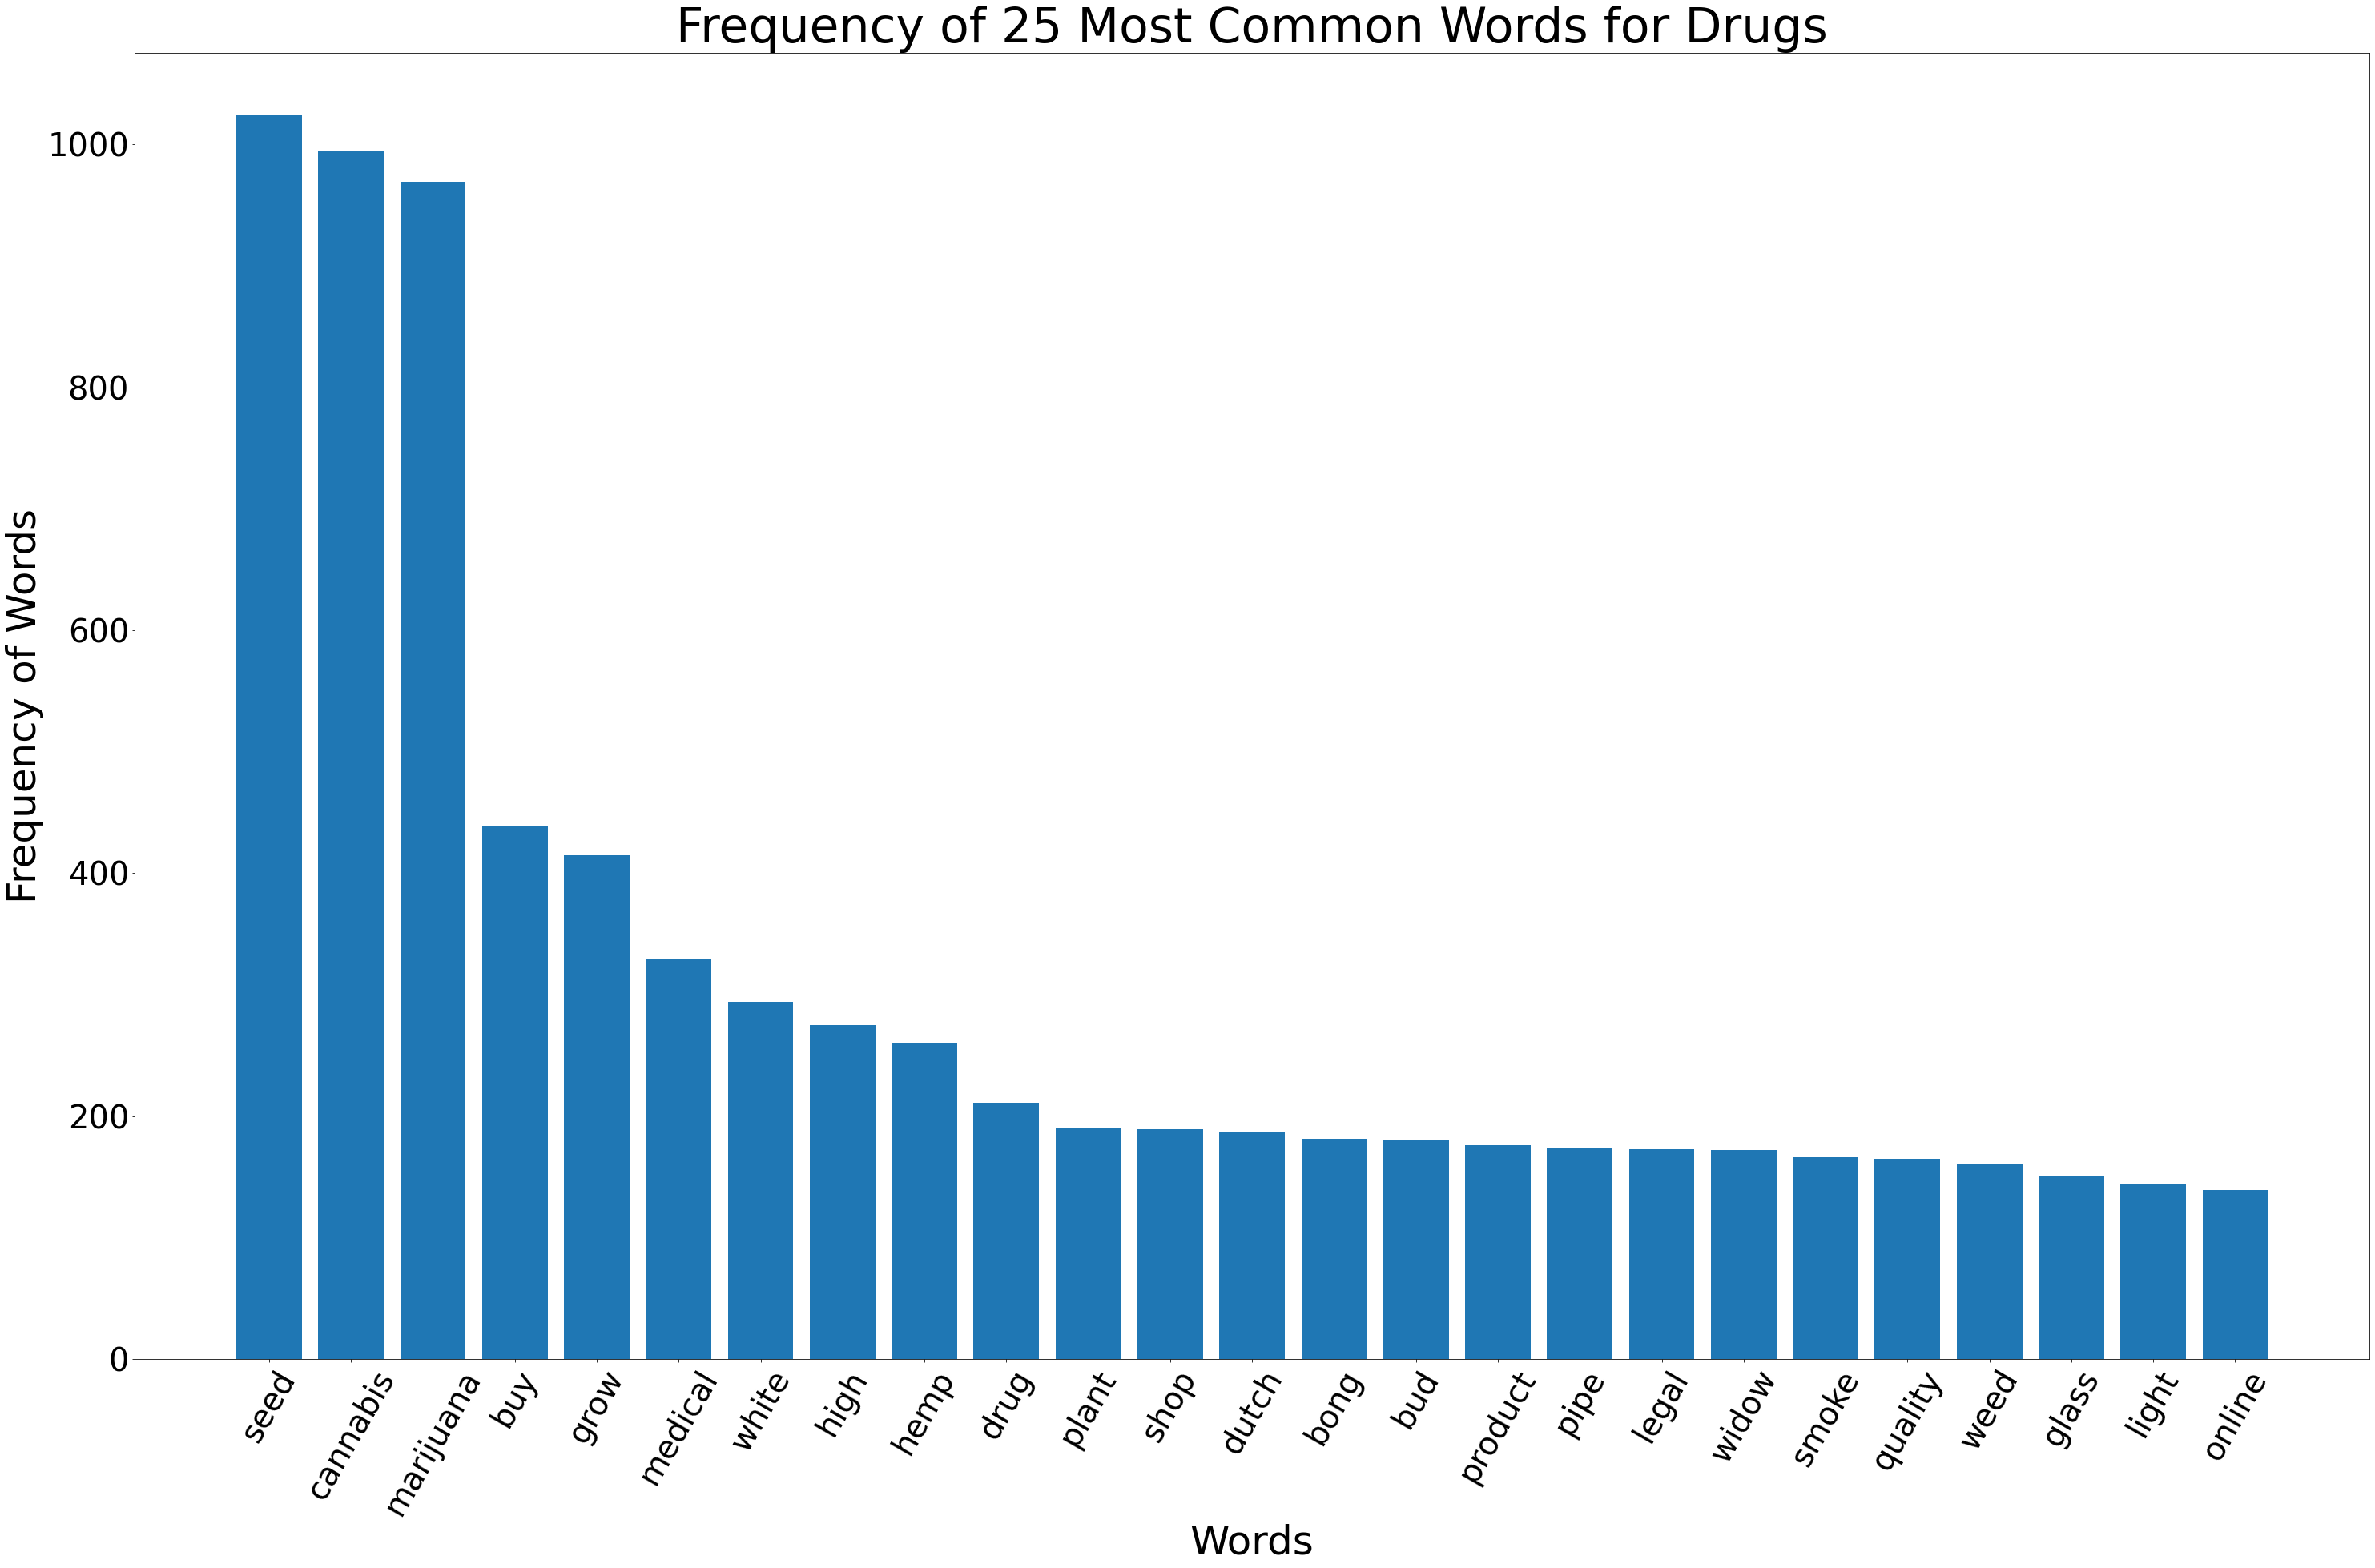

In [8]:
#Drugs
group_by_dr = df_group_by.iloc[1]
words_dr = list(zip(*group_by_dr))[0]
freq_dr = list(zip(*group_by_dr))[1]

plt.figure(figsize=(50,30))
plt.bar(words_dr, freq_dr)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Drugs', fontsize=60)
plt.show()

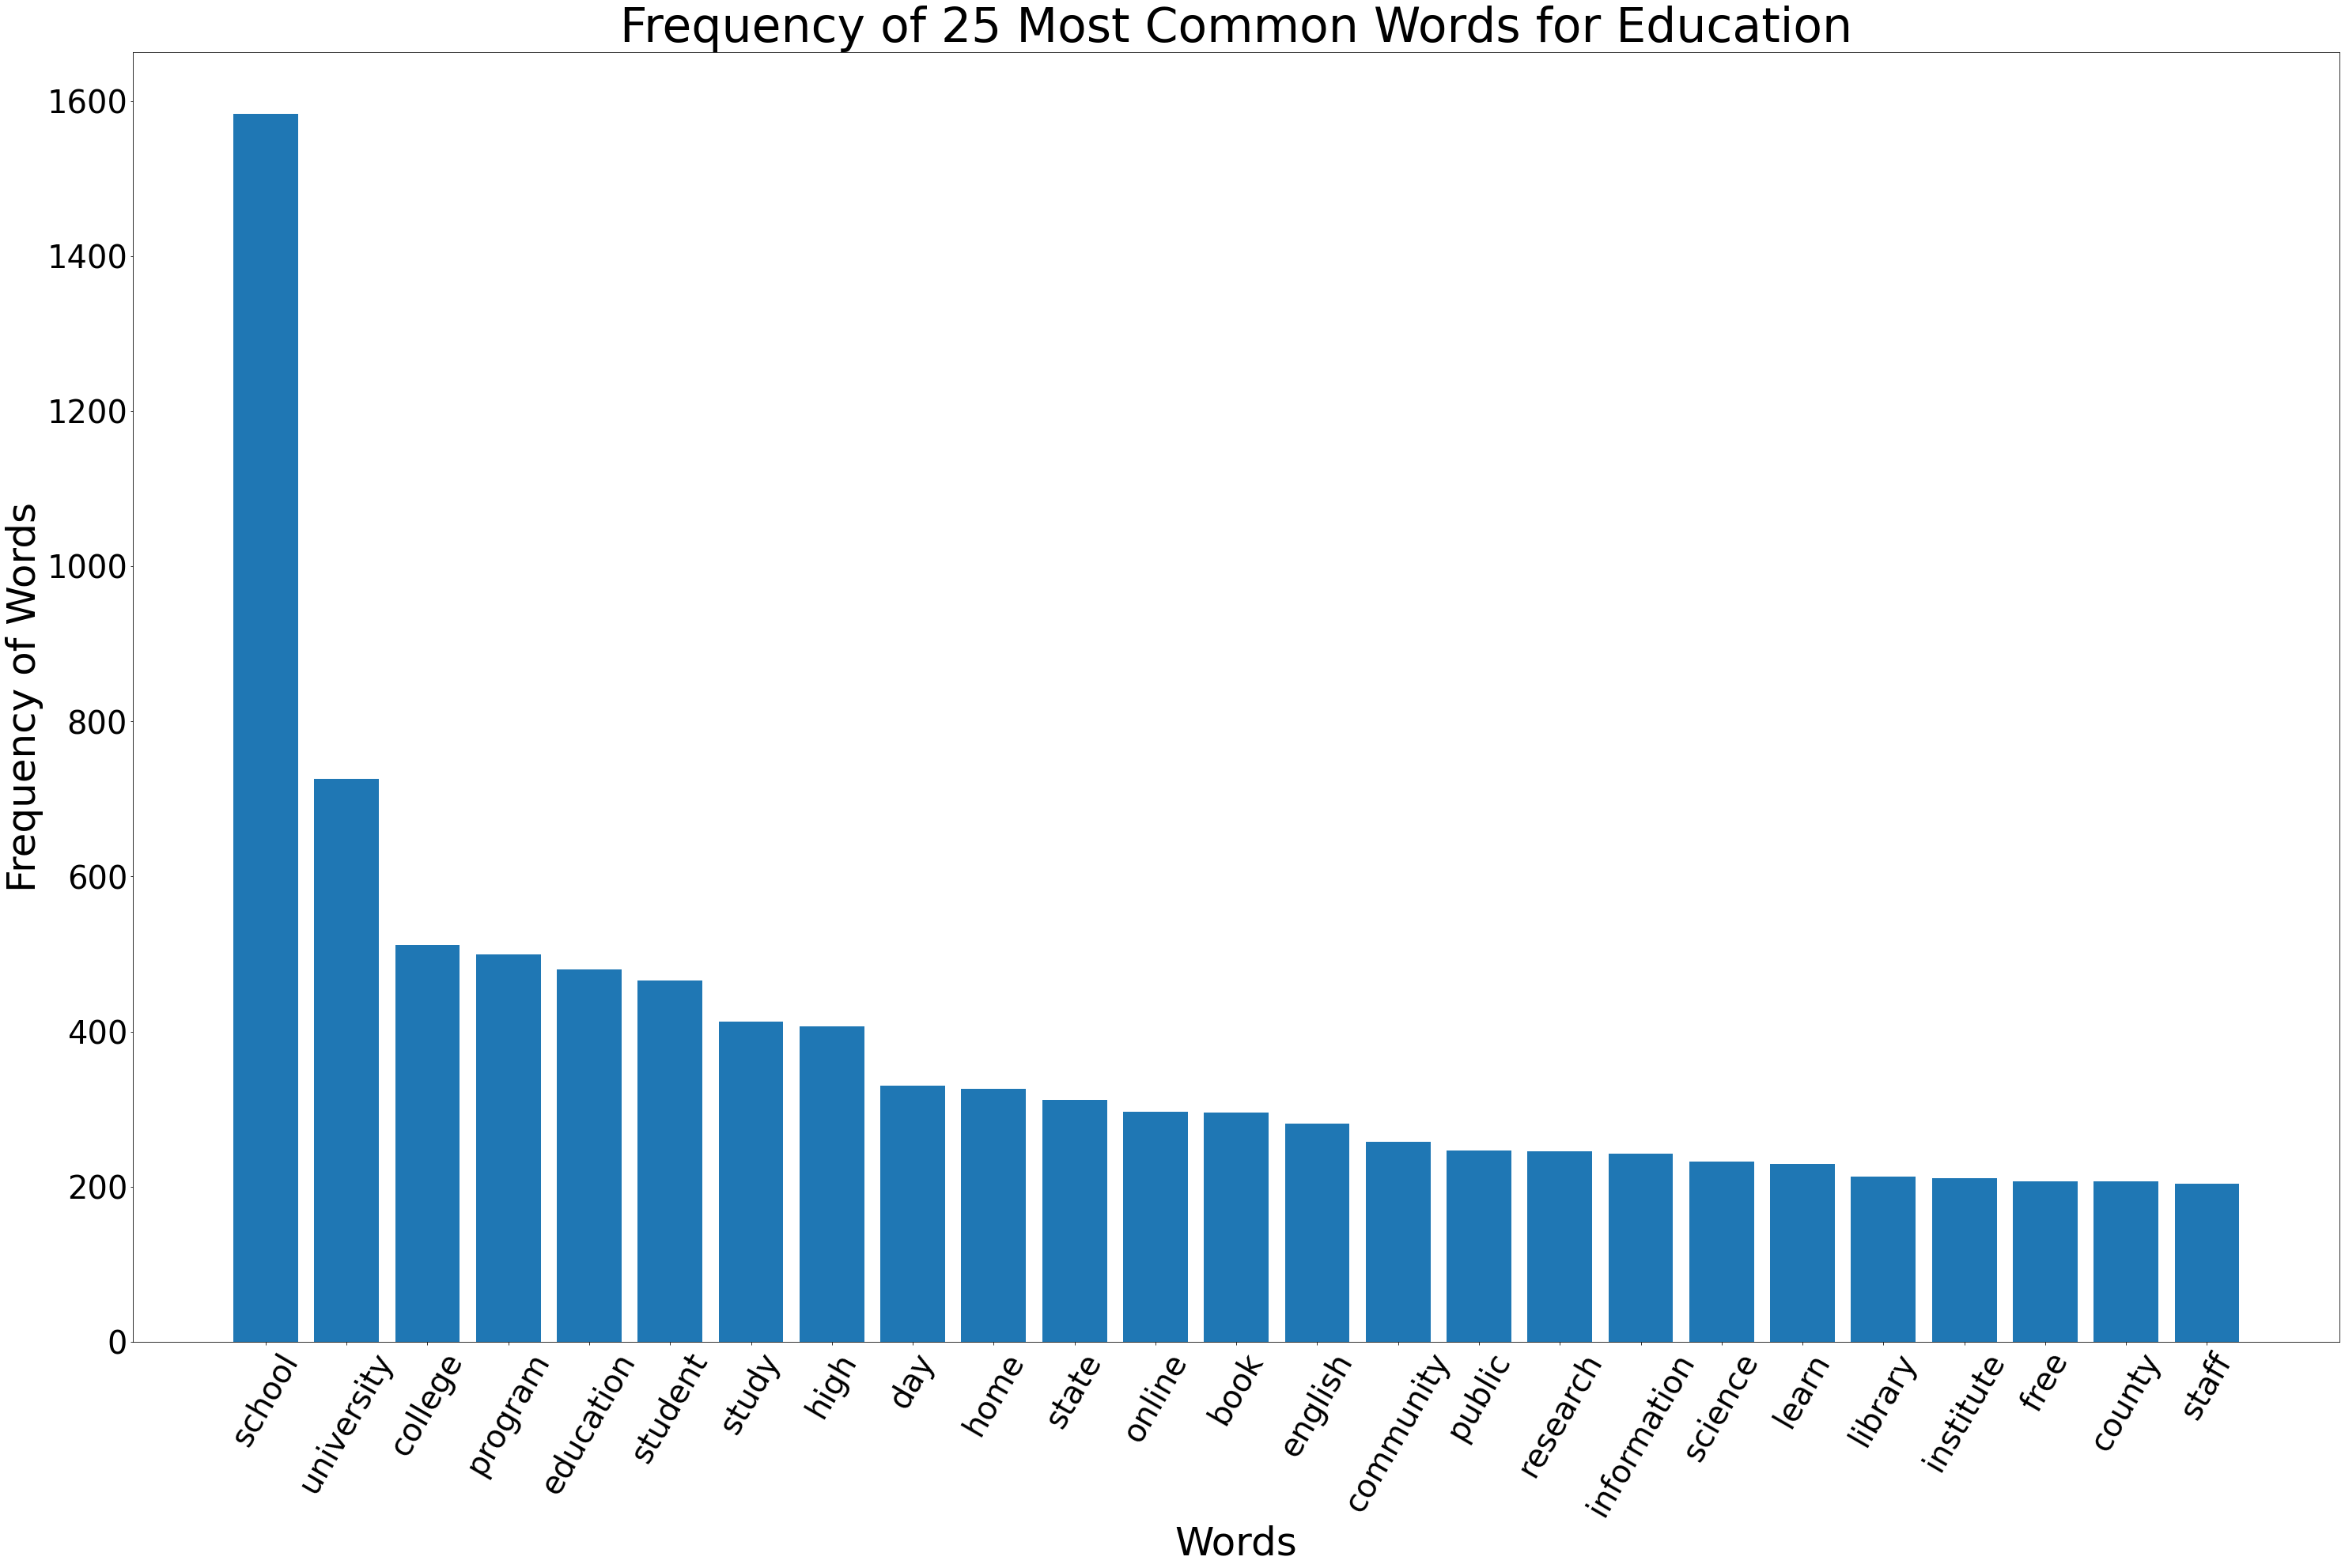

In [9]:
#Education
group_by_ed = df_group_by.iloc[2]
words_ed = list(zip(*group_by_ed))[0]
freq_ed = list(zip(*group_by_ed))[1]

plt.figure(figsize=(50,30))
plt.bar(words_ed, freq_ed)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Education', fontsize=60)
plt.show()

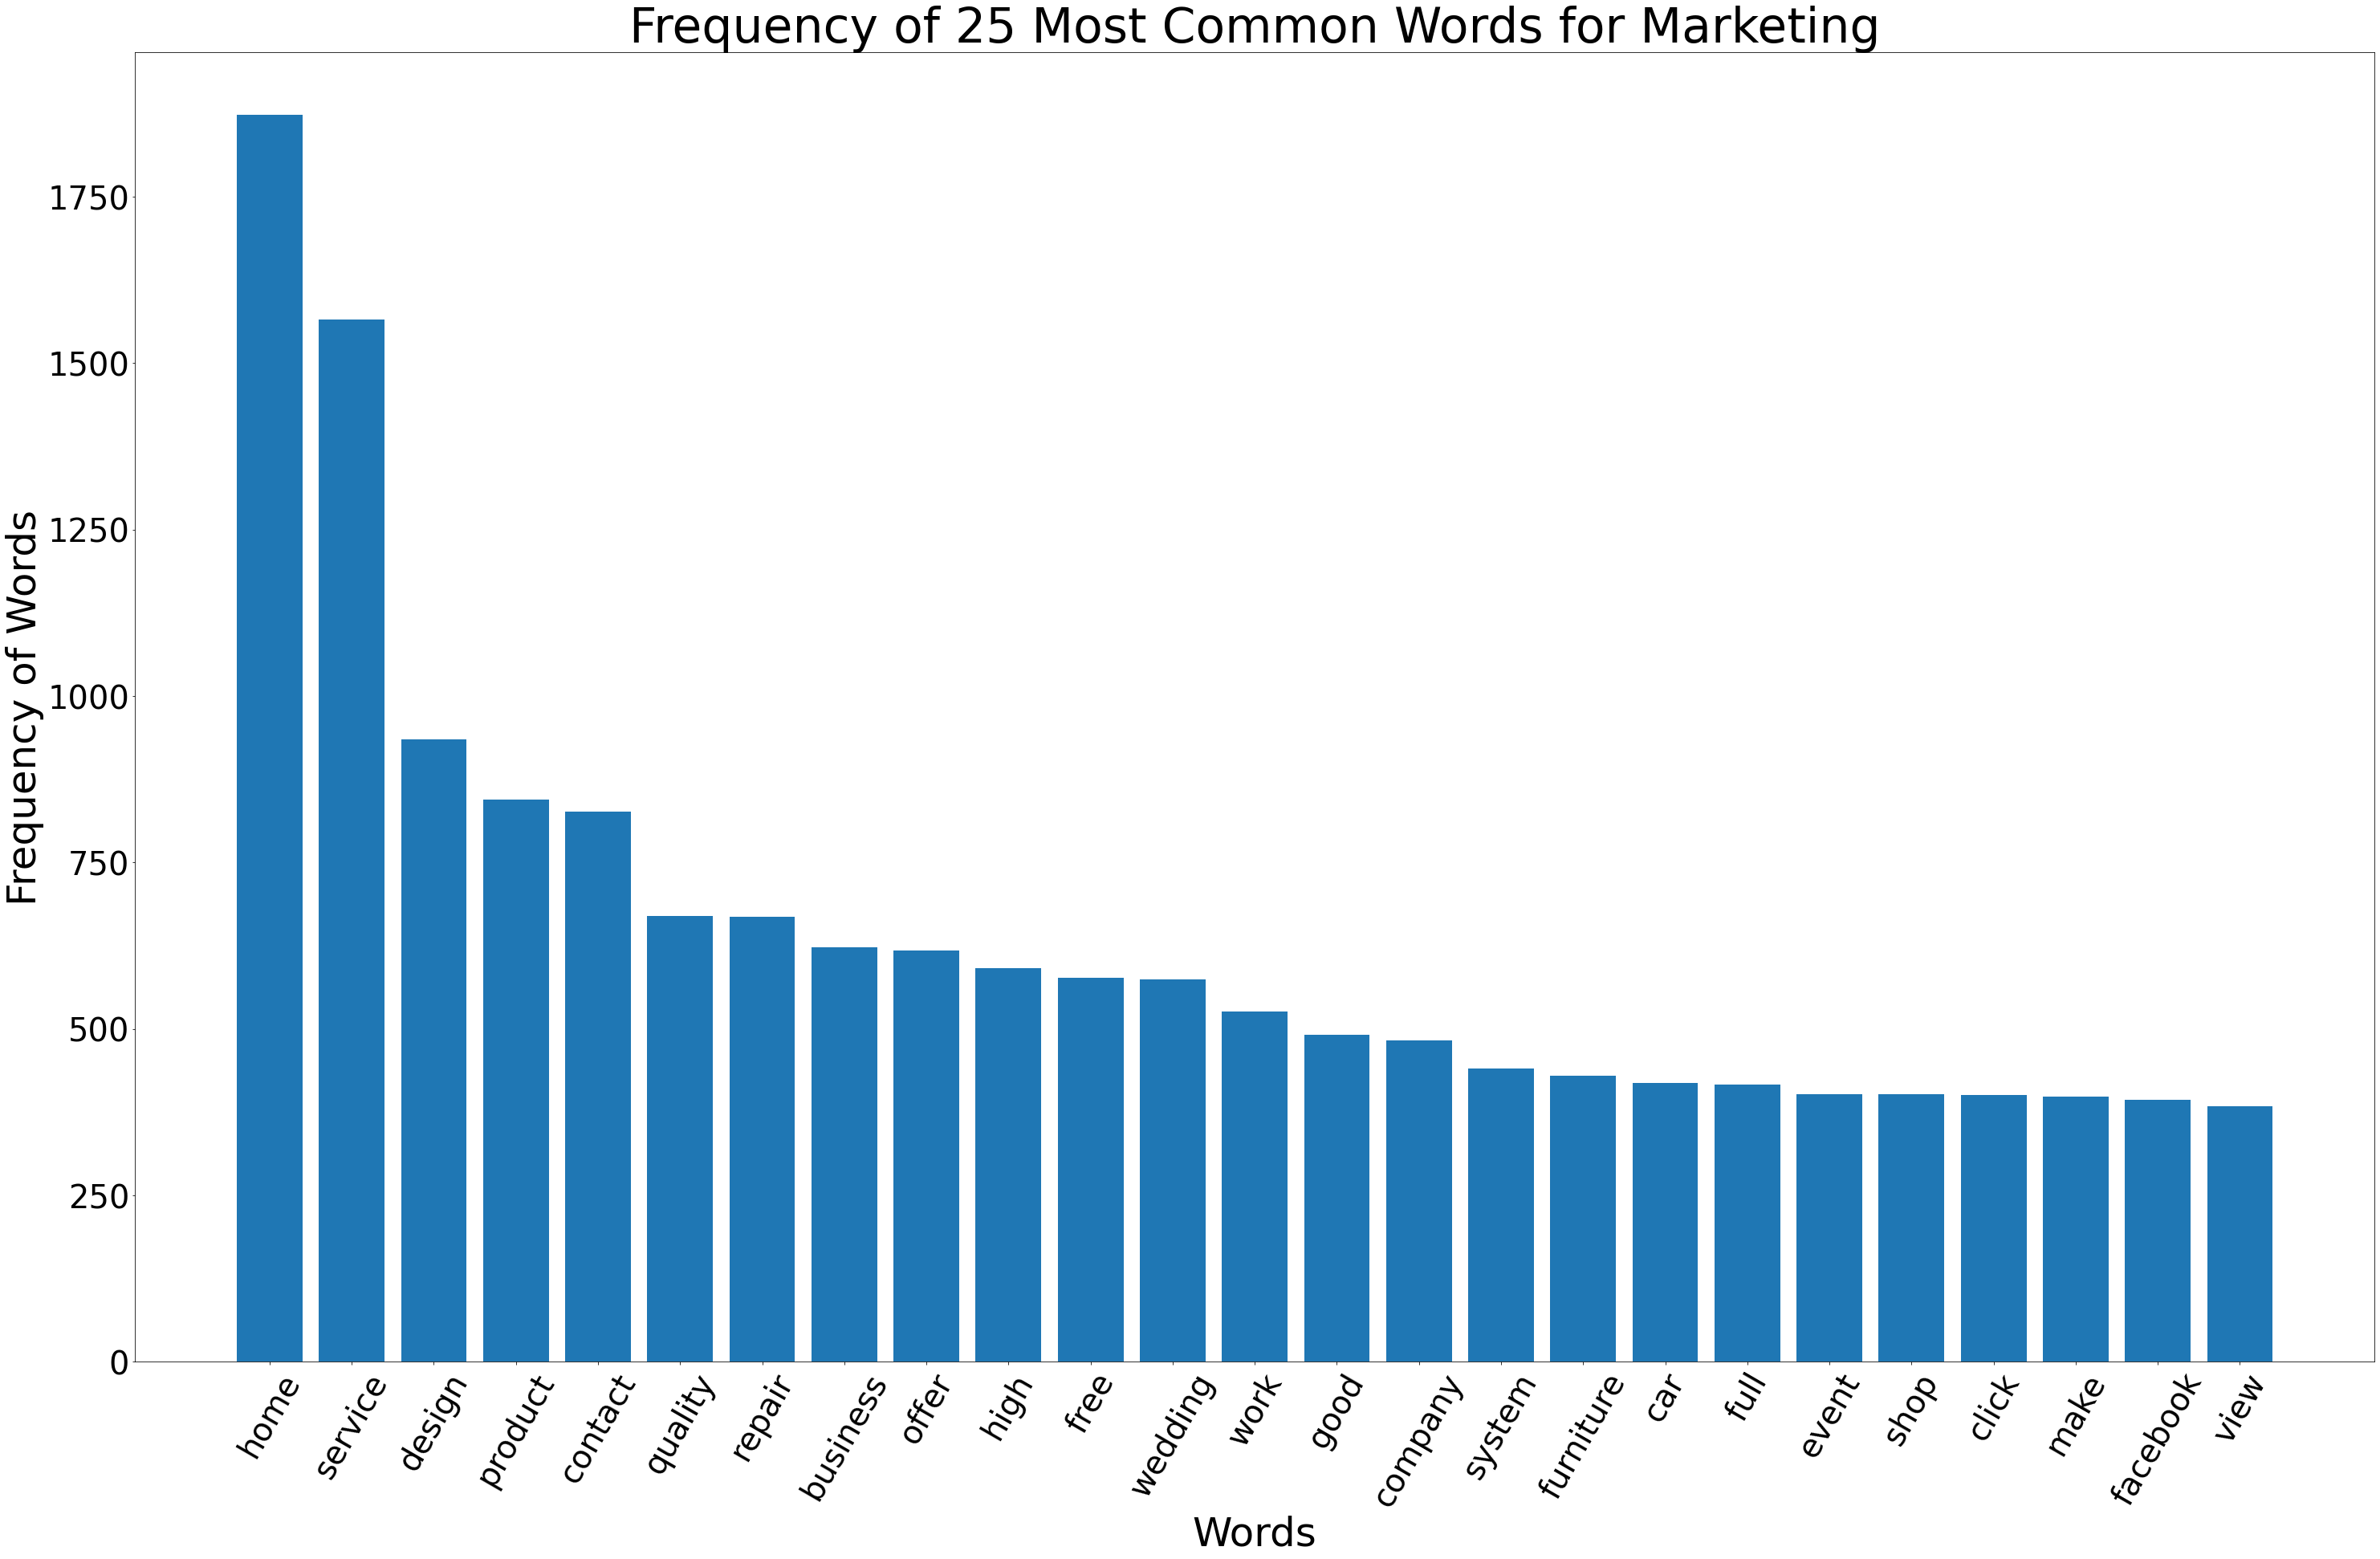

In [10]:
#Marketing
group_by_mk = df_group_by.iloc[3]
words_mk = list(zip(*group_by_mk))[0]
freq_mk = list(zip(*group_by_mk))[1]

plt.figure(figsize=(50,30))
plt.bar(words_mk, freq_mk)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Marketing', fontsize=60)
plt.show()

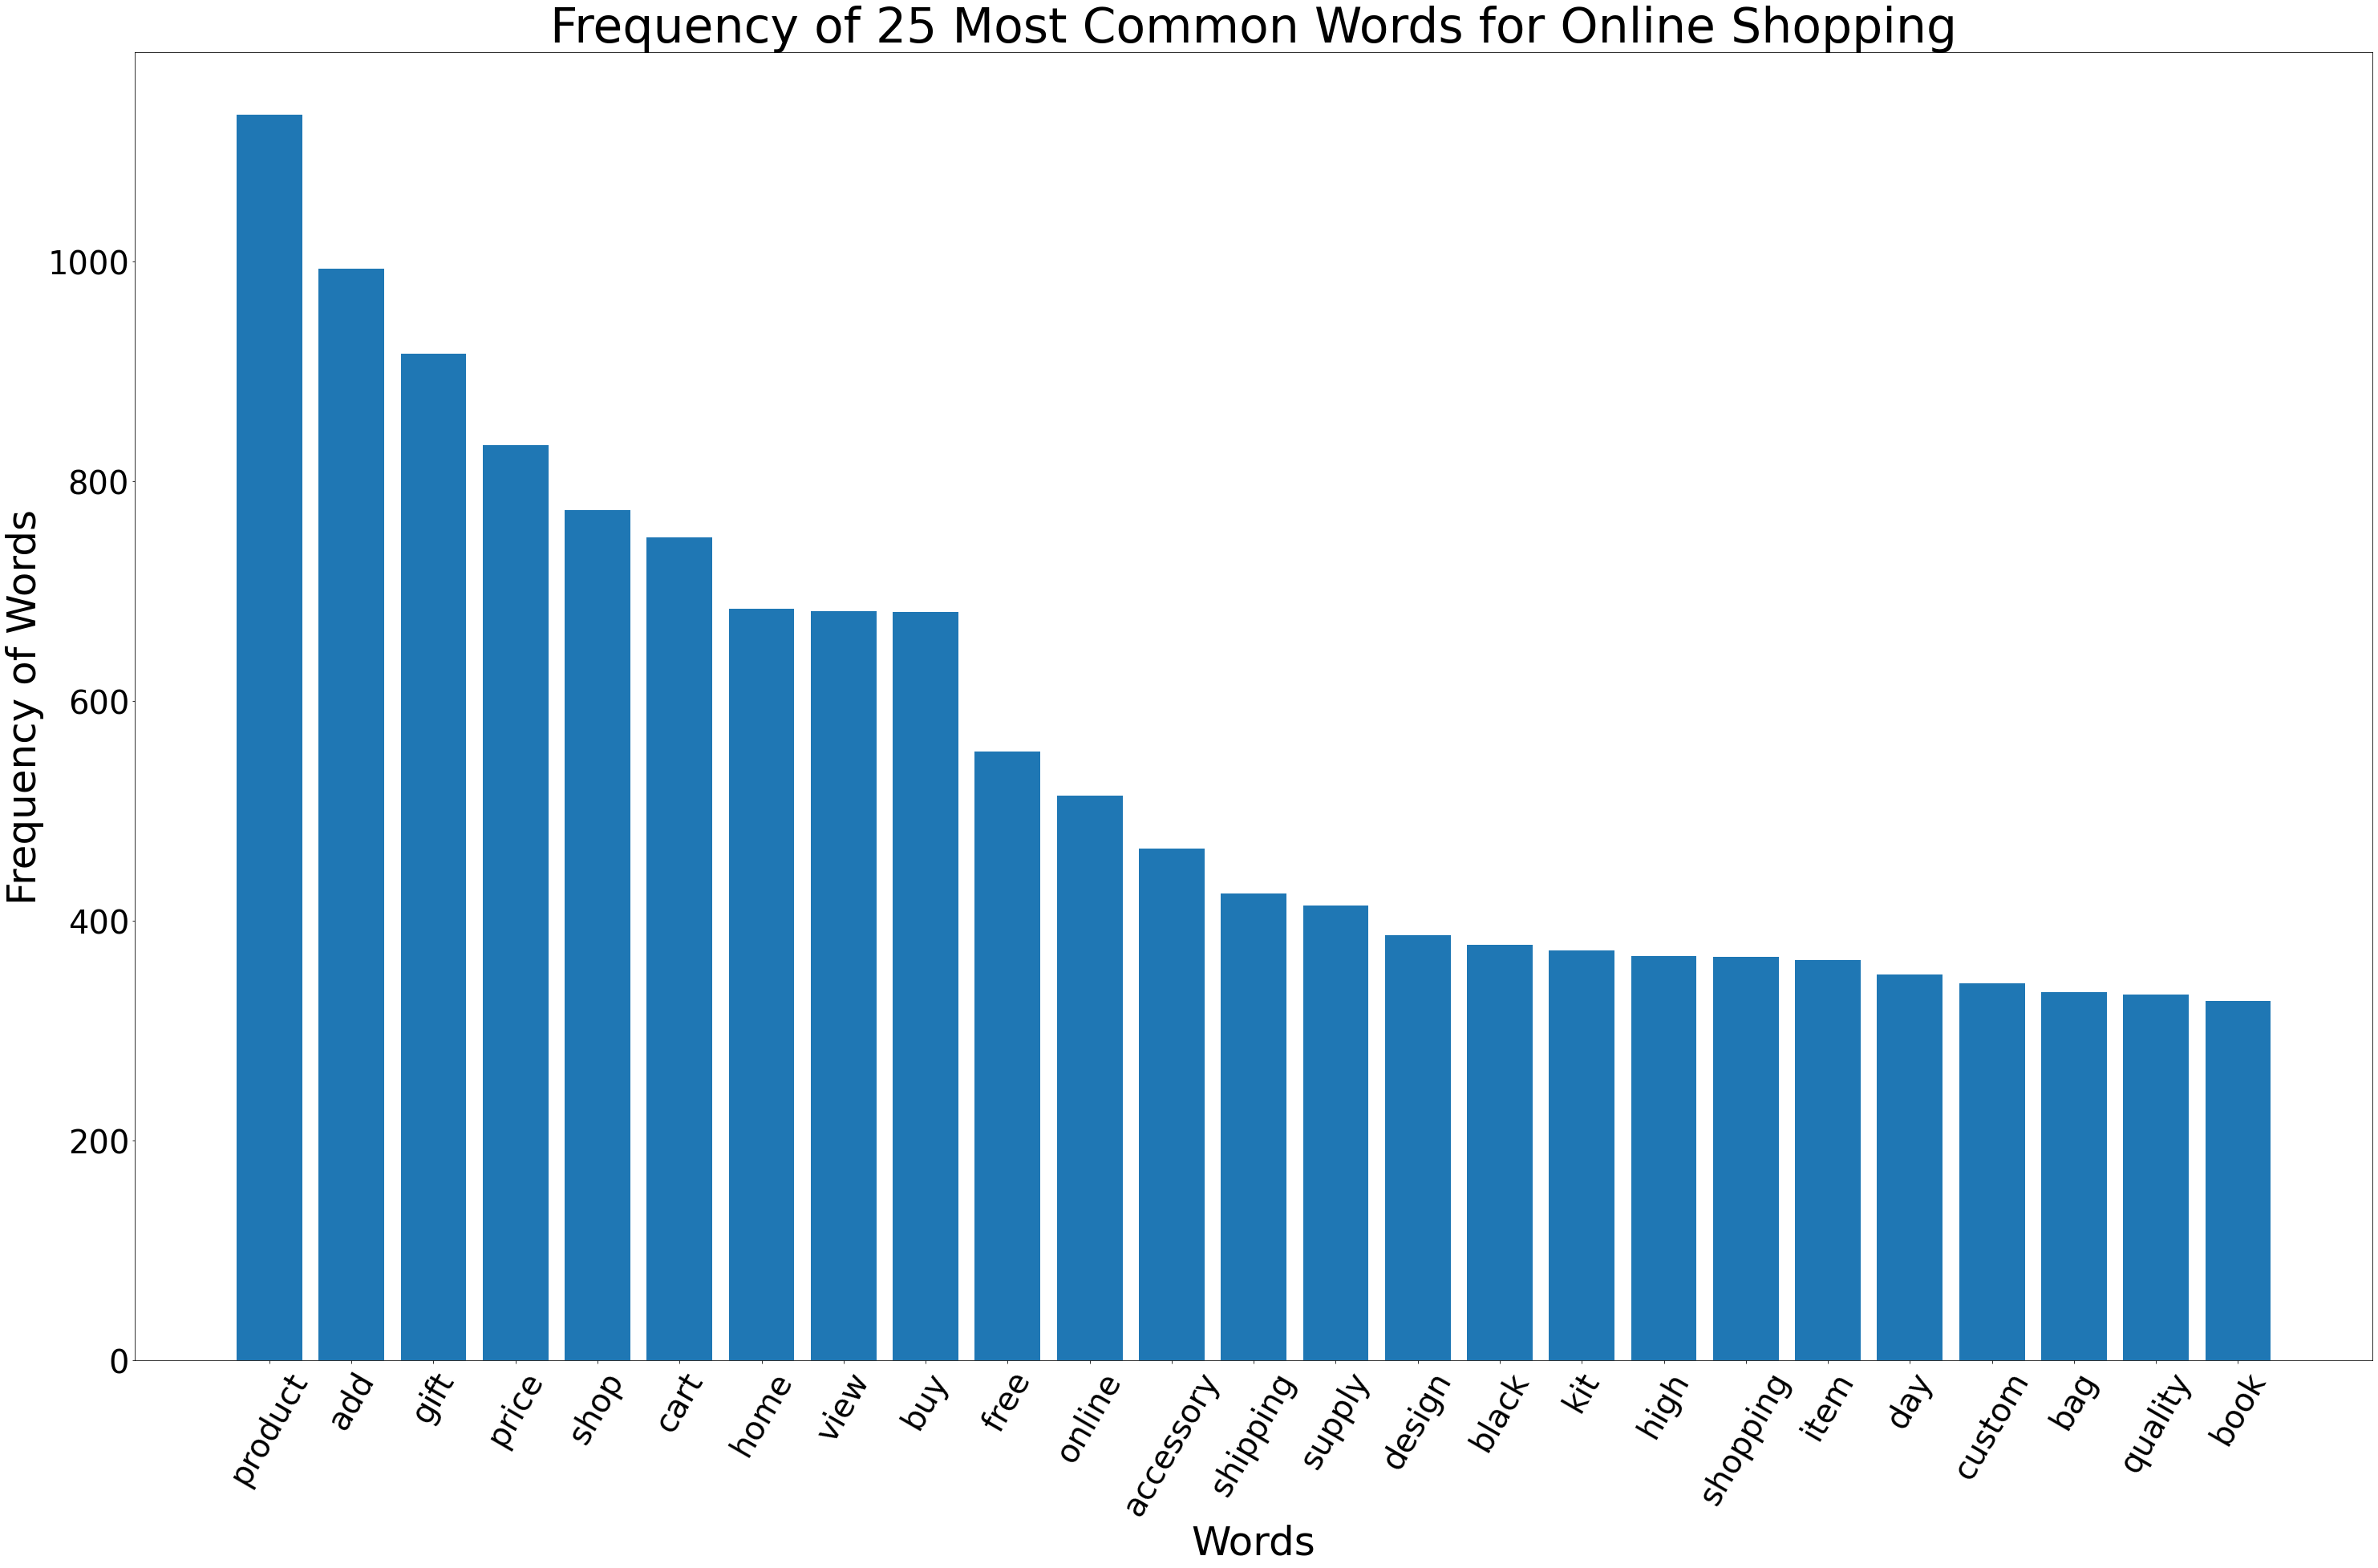

In [11]:
#Online Shopping
group_by_os = df_group_by.iloc[4]
words_os = list(zip(*group_by_os))[0]
freq_os = list(zip(*group_by_os))[1]

plt.figure(figsize=(50,30))
plt.bar(words_os, freq_os)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Online Shopping', fontsize=60)
plt.show()

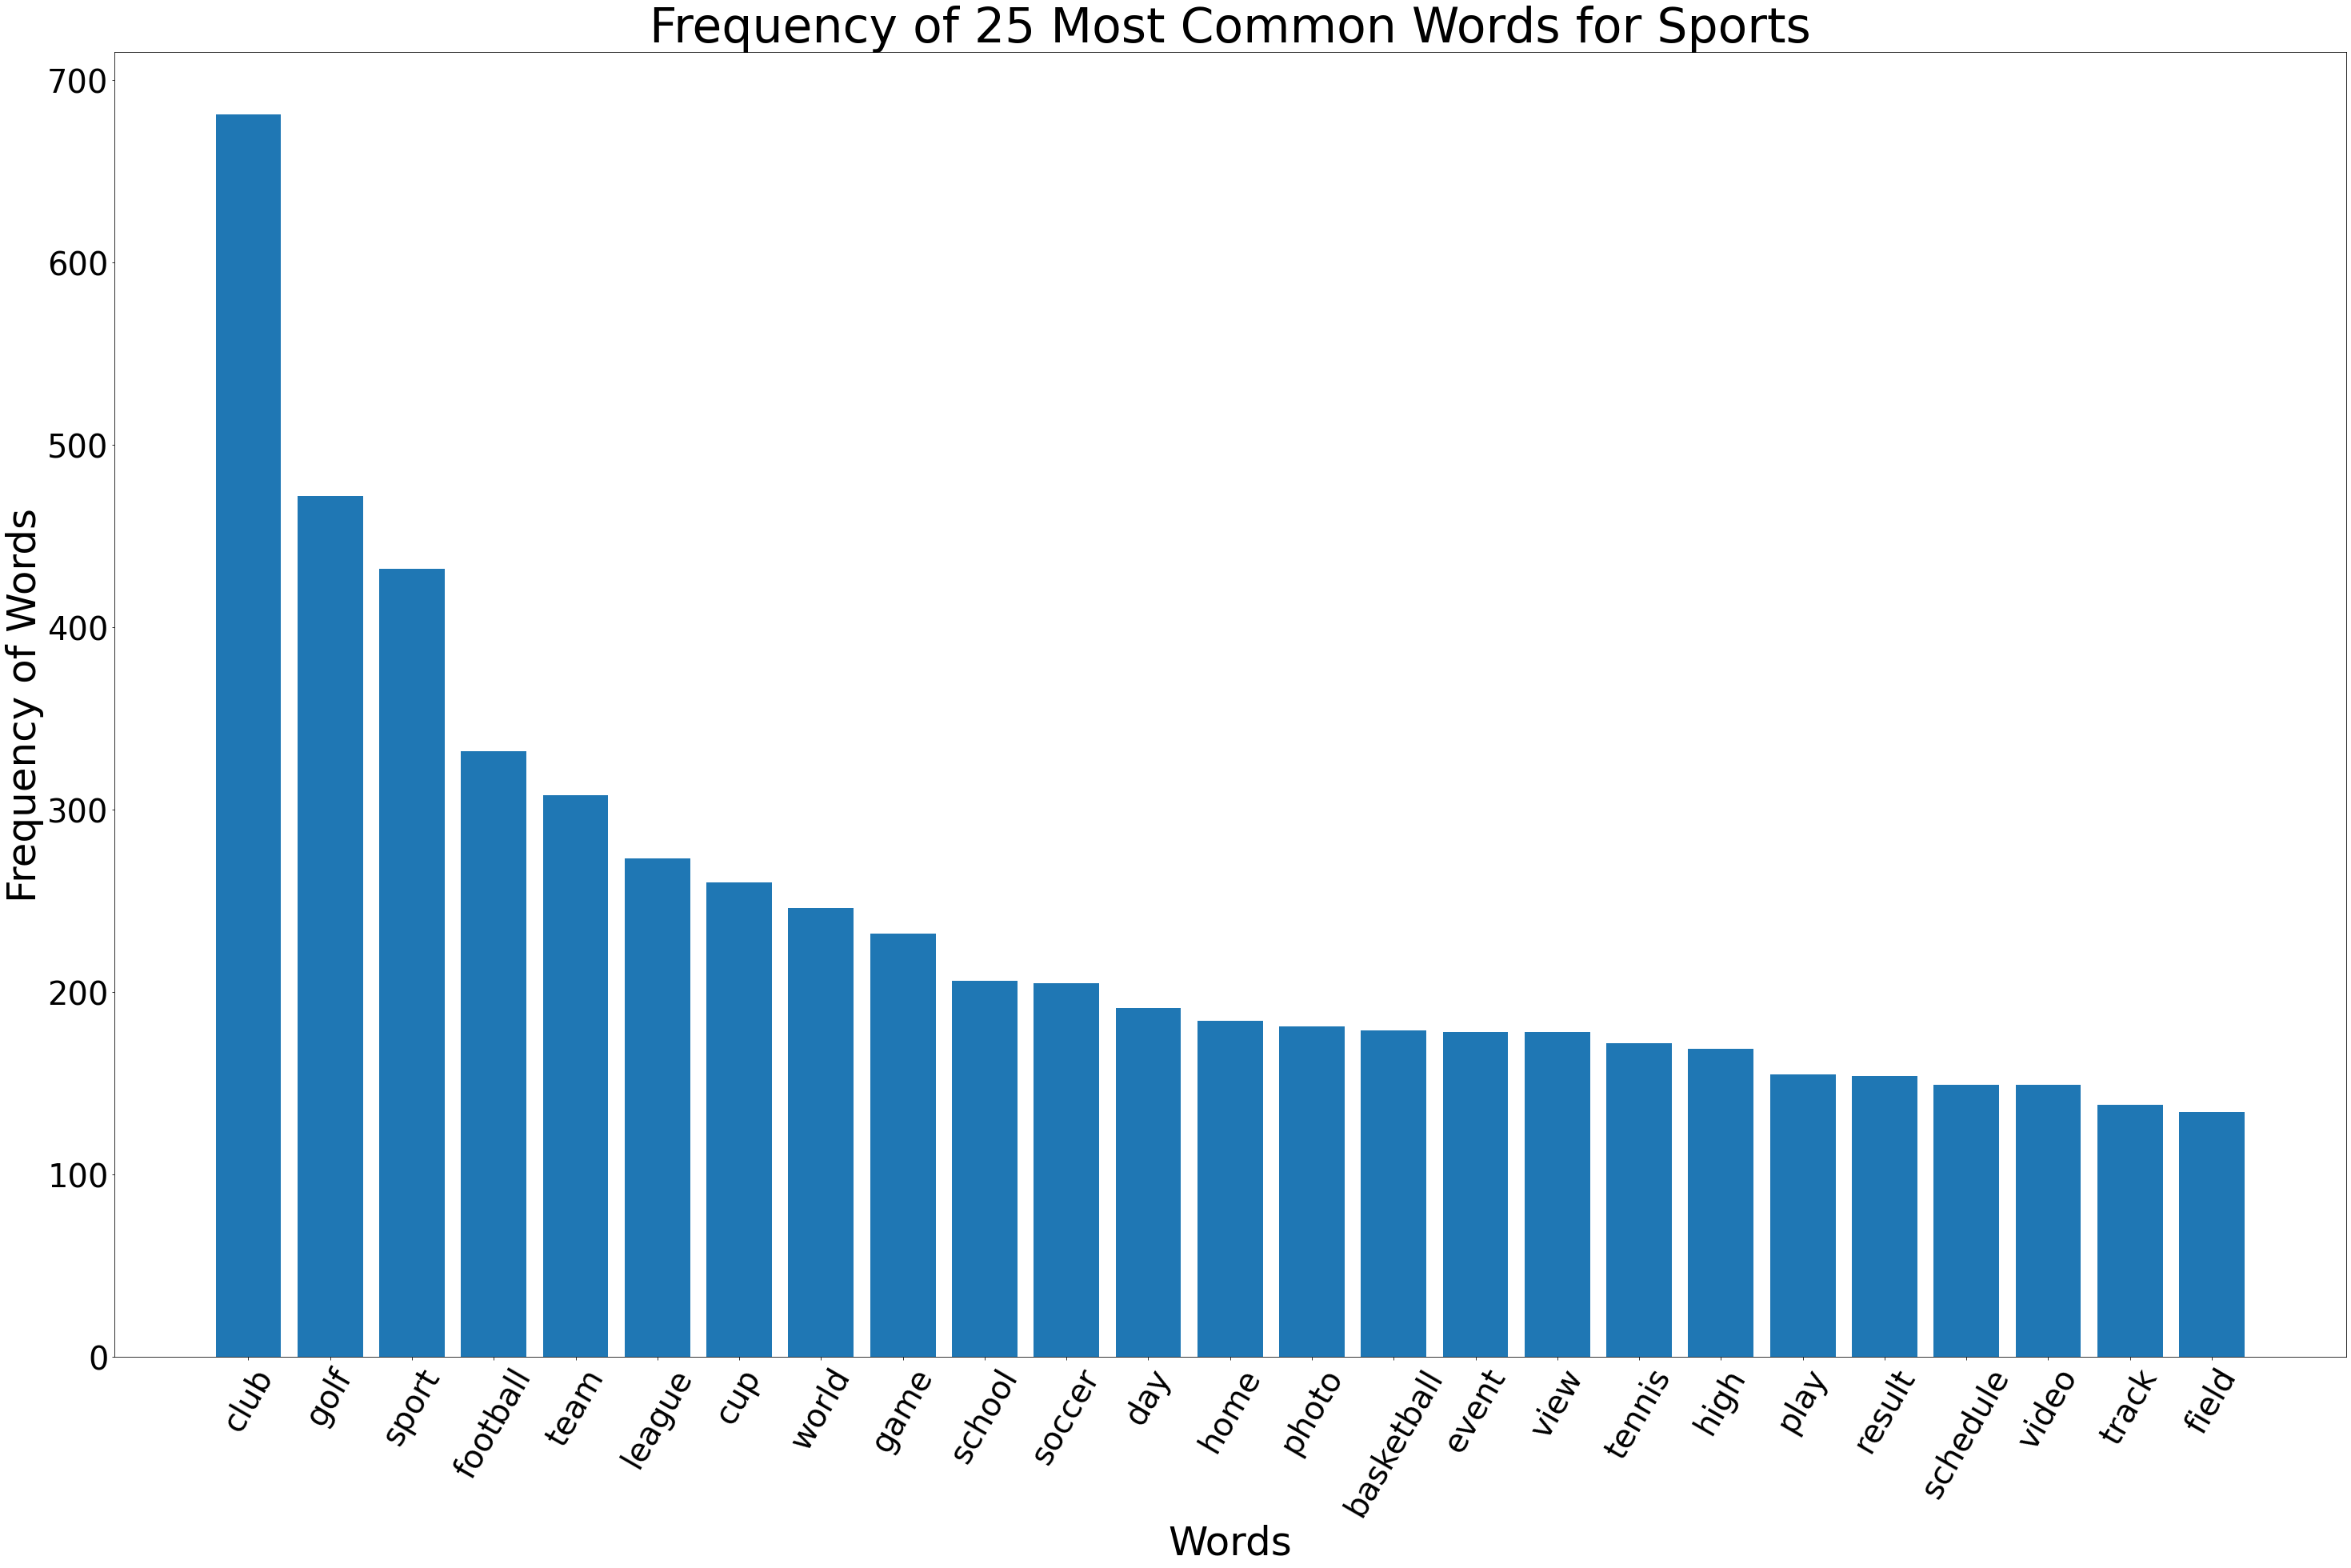

In [12]:
#Sports
group_by_sp = df_group_by.iloc[5]
words_sp = list(zip(*group_by_sp))[0]
freq_sp = list(zip(*group_by_sp))[1]

plt.figure(figsize=(50,30))
plt.bar(words_sp, freq_sp)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Sports', fontsize=60)
plt.show()

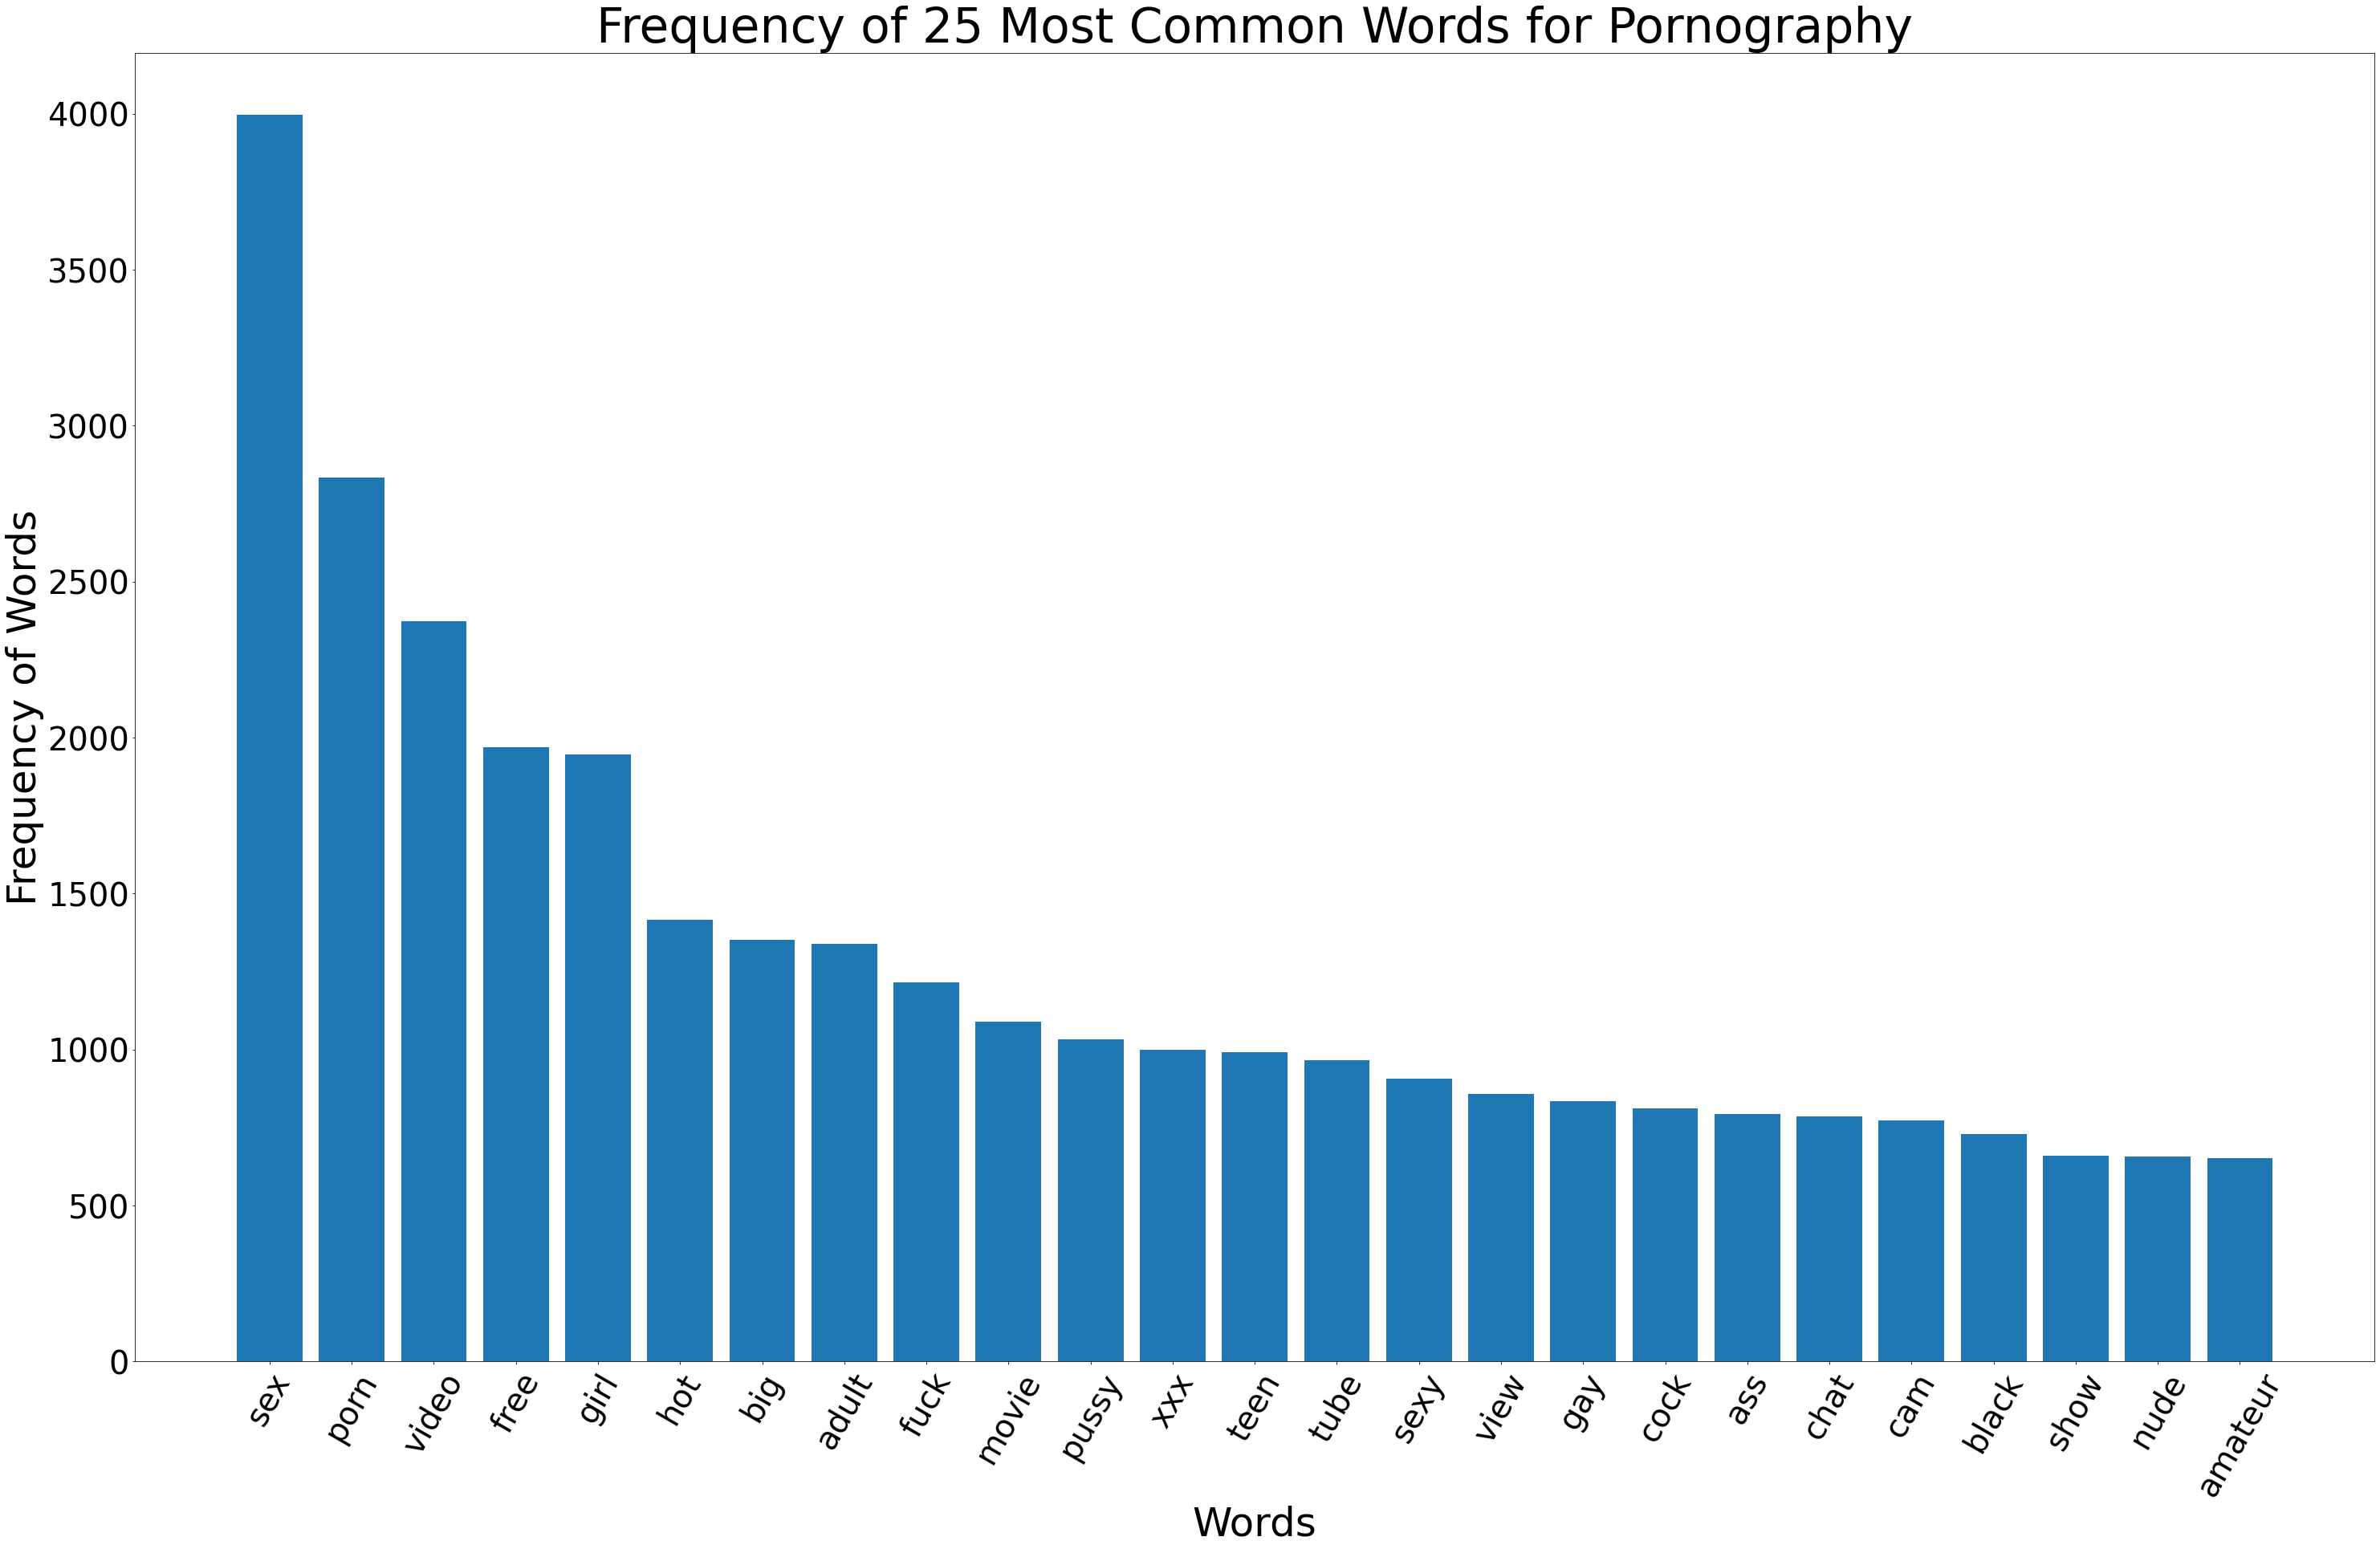

In [13]:
#Pornography
group_by_sx = df_group_by.iloc[6]
words_sx = list(zip(*group_by_sx))[0]
freq_sx = list(zip(*group_by_sx))[1]

plt.figure(figsize=(50,30))
plt.bar(words_sx, freq_sx)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Pornography', fontsize=60)
plt.show()

# Topic Modeling

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.9,min_df=25)

tf = tf_vectorizer.fit_transform(df['clean_comp_nouns'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

doc_term_matrix = pd.DataFrame(tf.toarray(),columns=list(tf_feature_names))
doc_term_matrix

,aa,aaa,aaaa,aac,aaliyah,aan,aaron,ab,aba,abatement,...,zu,zubehor,zulu,zum,zumba,zur,zurich,zuzana,zx,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# LDA Topic Modeling

In [15]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

KeyboardInterrupt: 

# Non-Negative Matrix Factorization (NMF)

In [ ]:
#TF-IDF approach using Non-Negative Matrix Factorization (NMF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=25,max_features=5000,use_idf=True)

tfidf = tfidf_vectorizer.fit_transform(df['clean_comp_nouns'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(),columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

In [ ]:
nmf = NMF(n_components=15, random_state=1234,alpha=.1,init='nndsvd').fit(tfidf)
display_topics(nmf,tfidf_feature_names,no_top_words)

In [ ]:
# lda_topic_values = lda_model.transform(tf)
# df['lda_topics'] = lda_topic_values.argmax(axis=1)

# lda_remap = {0:
# 'seeds marijuana cannabis httpwww seed plant de white medical drug', 1:
# 'business service contact management home services company us news design', 2:
# 'porn sex tube video com teen girl movies free adult', 3:
# 'club team golf new news th football game st city', 4:
# 'product equipment products system water power air machine parts steel', 5:
# 'school student program training home information university education course news', 6:
# 'service home repair contact design us services car door quality', 7:
# 'gift home wedding contact us shop product cart baby order', 8:
# 'gallery star love marie taylor edit lee pornstar lynn jessica', 9:
# 'accessories price cart store shop view furniture black light shipping'}

# df['lda_topics'] = df['lda_topics'].map(lda_remap)

nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)

nmf_remap = {0:
'management business marketing services service development software company solutions web', 1:
'porn teen sex tube pussy video girl videos milf xxx', 2:
'marijuana cannabis seeds seed weed strain plant medical bud pot', 3:
'school student education university college program campus calendar schools research', 4:
'cart gift shop shopping store shipping price account order products', 5:
'sex adult chat cam site singles toy toys cams live', 6:
'law attorney lawyer firm injury county estate litigation practice attorneys', 7:
'equipment system water product products power systems machine energy air', 8:
'golf club football league sports news team basketball soccer game', 9:
'wedding photography photographer weddings photo event portrait flower party studio', 10:
'furniture design kitchen room office dining table home bedroom wood', 11:
'escort escorts agency girl london independent massage service adult vip', 12:
'hd online video definition audio amateure chat high cam live', 13:
'repair service auto services car cleaning parts air maintenance home', 14:
'gay twink boy porn boys tube cock sex bareback man'}

df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_train = pd.read_csv('C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\train_comp_nouns_v1.csv')
#training data
X_train = df_train['clean_comp_nouns']
y_train = df_train['category']

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True, min_df=25,max_df=.9, norm="l2",smooth_idf=True)
tv_train_features = tv.fit_transform(X_train)

X_opt=SelectKBest(chi2, k=2000)
tv_train_features_trimmed = X_opt.fit_transform(tv_train_features, y_train)
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub = tv_train_features[:,imp_Feats_array]



In [ ]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

labels = y_train.unique().tolist()
tsne = TSNEVisualizer(labels=labels, decompose='svd',decompose_by=50)
tsne.fit(tv_train_features_sub,y_train)
tsne.show()